# Tesfabirhan W. REDIE


# Dev IA - Evaluation n°1 - Mars 2022
Ceci est un point d'étape pour évaluer les compétences acquises à ce stade. 
  
Faites une copie de ce notebook, modifiez-le librement puis partager votre travail en fin de session sur Simplonline (veuillez vous assurer que les accès à votre document sont autorisés à des tiers).


## Objectifs
Pour toute les étapes ci-dessous il vous est demandé d'**argumenter vos choix** et d'**expliquer les résultats** obtenus.

* Réaliser une EDA (Exploratory Data Analysis) sur le jeu de données
  - Descrire les données
  - Réaliser une analyse univariée et bivariée

* Réaliser le preprocessing des données
  - Gérer les données manquantes
  - Procéder à la normalisation / encodage

* Entrainer un modèle d'apprentissage supervisé
  - Choisir un modèle répondant aux objectifs du projet
  - Définir les paramètres du modèle
  - Utiliser la validation croisée

* Evaluer le modèle
  - Choisir la ou les métriques d'erreur
  - Valider les performances obtenues

* Conclure
  - Réalisation du projet
  - Difficultés
  - Performance
  - ...


## Bonus
Pour ceux qui veulent aller plus loin, vous pouvez notamment :

* Utiliser un Pipeline
* Procéder à une recherche exhaustive des hyper-paramètres (grid search)
* Procéder à une comparaison de modèles
* Réaliser une prédiction sur des nouvelles données
* Restituer des graphiques pour améliorer la compréhension du projet
* Laisser parler votre intuition ...

##Le jeu de données
Le jeu de données est disponible ci-dessous.  
Il concerne le recensement d'animaux marins (dauphins) selon différentes caractéristiques :
* la cible à prédire est la colonne `variety`
* les features (numériques et catégorielles) sont toutes les autres colonnes :
  - `area` : zone géographique où l'animal réside
  - `dimension_1_mm` : dimension n°1 de l'animal
  - `dimension_2_mm` : dimension n°2 de l'animal
  - `dimension_3_mm` : dimension n°3 de l'animal
  - `mass_g` : masse de l'animal
  - `sex` : genre de l'animal

## 1. Libraries

In [1]:
#libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

## 2. Data 

In [2]:
#import data

url = "https://raw.githubusercontent.com/remijul/dataset/master/dolphins.csv"

df = pd.read_csv(url)
df.head()

,variety,area,dimension_1_mm,dimension_2_mm,dimension_3_mm,mass_g,sex
0,Tropicalis,Artic,39.1,18.7,181.0,3750.0,MALE
1,Tropicalis,Artic,39.5,17.4,186.0,3800.0,FEMALE
2,Tropicalis,Artic,40.3,18.0,195.0,3250.0,FEMALE
3,Tropicalis,Artic,NaN,NaN,NaN,NaN,NaN
4,Tropicalis,Artic,36.7,19.3,193.0,3450.0,FEMALE


## 2. Explanatory Data Analysis, EDA

### Dataset

In [3]:
## Dataset

df.shape

(344, 7)

In [4]:
# columns

df.columns

Index(['variety', 'area', 'dimension_1_mm', 'dimension_2_mm', 'dimension_3_mm',
       'mass_g', 'sex'],
      dtype='object')

 ` The dolphin document consists of 344 rows, and 7 columns.`

In [5]:
# Data type

df.dtypes


variety            object
area               object
dimension_1_mm    float64
dimension_2_mm    float64
dimension_3_mm    float64
mass_g            float64
sex                object
dtype: object

`Data type:`

3 objects = [variety, area, sex]\
4 numericals = [dimension_1_mm, dimension_2_mm, dimension_3_mm, mass_g]


### Duplicates and Missing Data

In [6]:
#checking for duplicates

df.duplicated().sum()

0

In [7]:
# missing values
df.isnull().sum()

variety            0
area               0
dimension_1_mm     2
dimension_2_mm     2
dimension_3_mm     2
mass_g             2
sex               10
dtype: int64

## 3. Preprocessing

### Replacing missing values

From our EDA:

1. We have learnt that there are no duplicates.

2. The are however missing values. I will replace the missing numerical values with their mean values. However, the sex is not easy to be determined, hence I will drop any missing values from the sex column.

In [8]:
# dropping missing value from the sex column

df = df.dropna(subset=['sex'])
df.shape

(334, 7)

- Replacing the numerical missing values with their average 

- Calculating the mean value:\

- Mean_value => $df.mean()$
- Round_decimal => $round(1)$

In [9]:
#dimension_1_mm
dimension_1_mm = df['dimension_1_mm'].fillna(round(df['dimension_1_mm'].mean(), 1), inplace=True)

In [10]:
#dimension_2_mm
dimension_2_mm = df['dimension_2_mm'].fillna(round(df['dimension_2_mm'].mean(), 1), inplace=True)

In [11]:
#dimension_3_mm

dimension_3_mm = df['dimension_3_mm'].fillna(round(df['dimension_3_mm'].mean(), 1), inplace=True)

In [12]:
# mass_g

mass_g = df['mass_g'].fillna(round(df['mass_g'].mean(), 1), inplace=True)

In [13]:
# New Data info()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   variety         334 non-null    object 
 1   area            334 non-null    object 
 2   dimension_1_mm  334 non-null    float64
 3   dimension_2_mm  334 non-null    float64
 4   dimension_3_mm  334 non-null    float64
 5   mass_g          334 non-null    float64
 6   sex             334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [14]:
#Data Description

df.groupby('sex').describe().round(2)

dimension_1_mm                                               \
                count   mean   std   min    25%   50%    75%   max   
sex                                                                  
.                 1.0  44.50   NaN  44.5  44.50  44.5  44.50  44.5   
FEMALE          165.0  42.10  4.90  32.1  37.60  42.8  46.20  58.0   
MALE            168.0  45.85  5.37  34.6  40.98  46.8  50.32  59.6   

       dimension_2_mm         ... dimension_3_mm        mass_g           \
                count   mean  ...            75%    max  count     mean   
sex                           ...                                         
.                 1.0  15.70  ...          217.0  217.0    1.0  4875.00   
FEMALE          165.0  16.43  ...          210.0  222.0  165.0  3862.27   
MALE            168.0  17.89  ...          219.0  231.0  168.0  4545.68   

                                                        
           std     min     25%     50%     75%     max  
sex                                                     
.          NaN  4875.0  4875.0  4875.0  4875.0  4875.0  
FEMALE  666.17  2700.0  3350.0  3650.0  4550.0  5200.0  
MALE    787.63  3250.0  3900.0  4300.0  5312.5  6300.0  

[3 rows x 32 columns]

### Data Visualization

array([[<AxesSubplot:title={'center':'.'}>,
        <AxesSubplot:title={'center':'FEMALE'}>],
       [<AxesSubplot:title={'center':'MALE'}>, <AxesSubplot:>]],
      dtype=object)

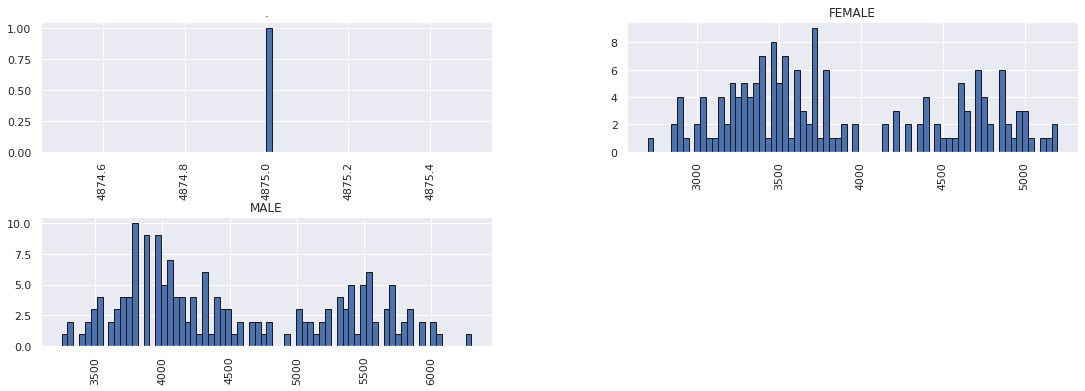

In [15]:
# Histogram

#Histogram plot

sns.set_style("darkgrid")
sns.set(rc = {'figure.figsize' : (18,6)})
df.hist(column = 'mass_g', by = 'sex', bins = 70, edgecolor = 'k')

Text(0.5, 1.0, 'Mass of different varieties of Dolphin')

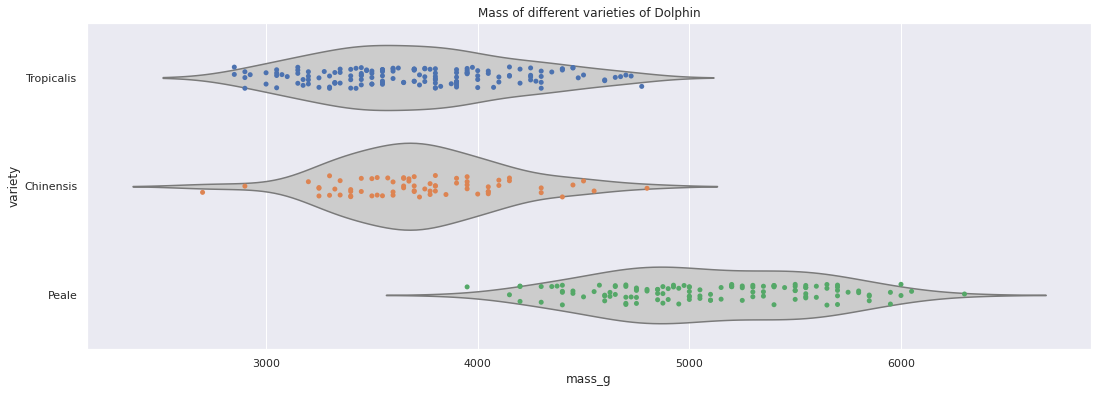

In [16]:
# Mean distribution graphic visualiation, violin plot

#Mean distribution grapgh, violin plot

ax = sns.violinplot(x =df['mass_g'], y =df['variety'], data=df, inner=None, color=".8")

ax = sns.stripplot(x =df['mass_g'], y =df['variety'], data=df)

ax.set_title('Mass of different varieties of Dolphin')

Synthesis:

Looking at the three varieties, 

- Peale: have more body mass compared to the other two other varieties, Chinesis and Tropicals. Their body mass ranges between 4000 to 7000 g, with main value

<AxesSubplot:>

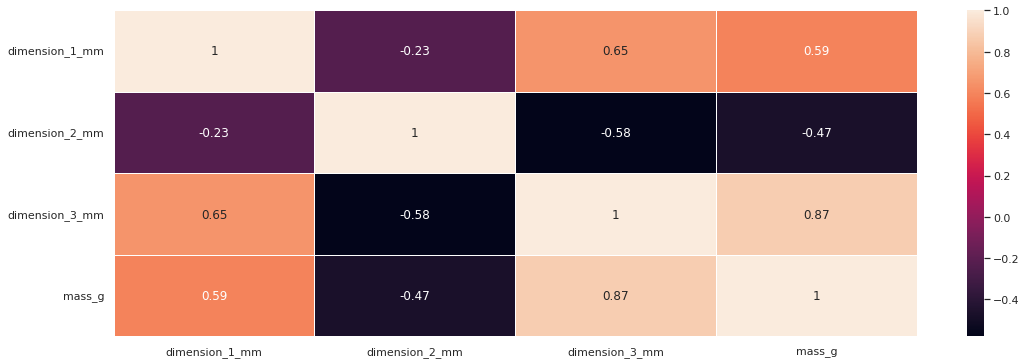

In [17]:
# Data correlation diagram

sns.heatmap(df.corr(), annot=True, linewidths=0.8)

/home/tess/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/tess/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/tess/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

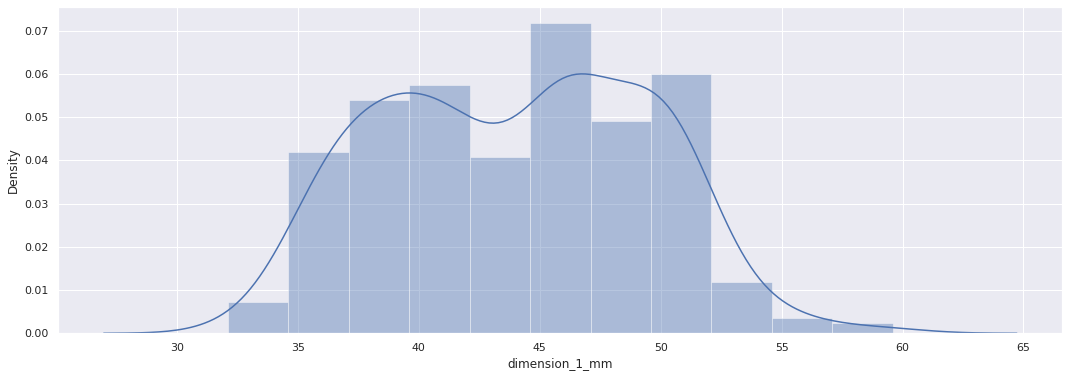

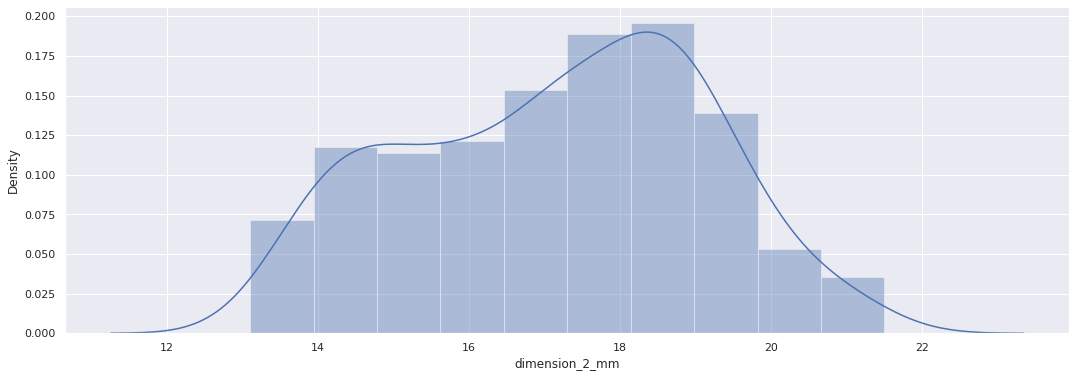

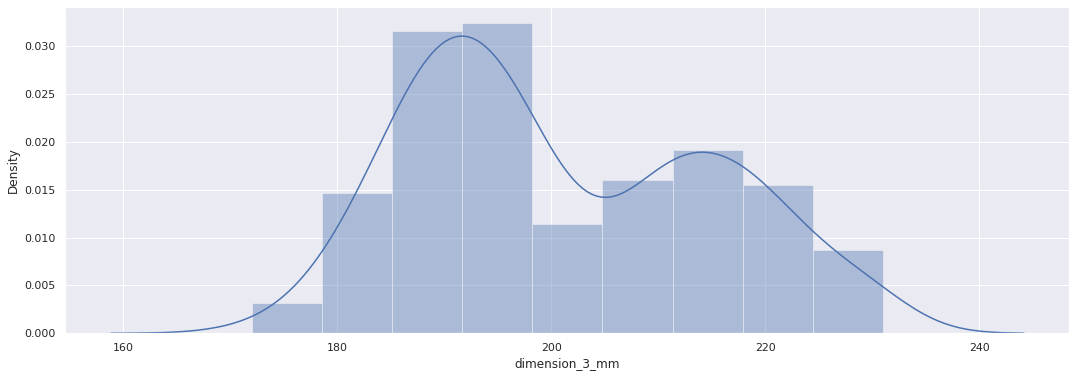

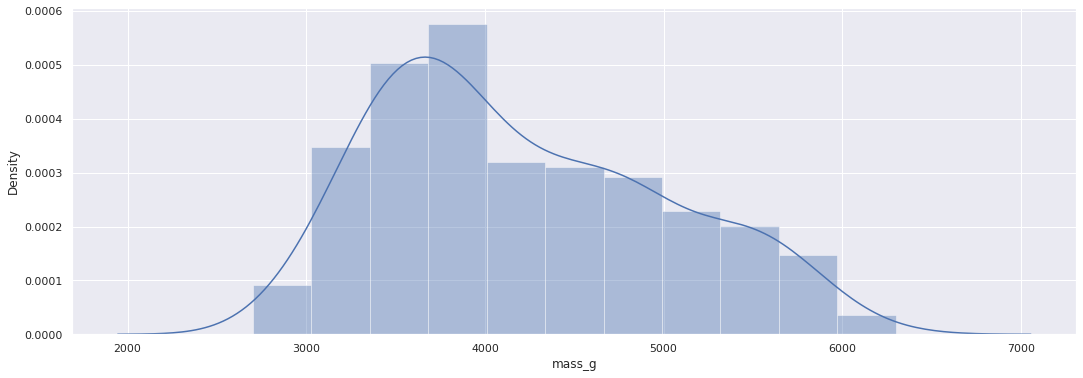

In [18]:
 # Analyse univariée de densité et distribution de chaque variable 

for col in df.select_dtypes('float64'):
    plt.figure()
    sns.distplot(df[col])
for col in df.select_dtypes('int64'):
    plt.figure()
    sns.distplot(df[col])

## Data preparation, data transformation and model training

In [19]:
# Libraries

# for encoding and transforming
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MaxAbsScaler
from sklearn.dummy import DummyClassifier

#pipeline
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer, make_column_transformer

#Grid Search
from sklearn.model_selection import train_test_split,GridSearchCV 


#model
from sklearn.ensemble import RandomForestClassifier 

#Model evaluation

from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Data Initiation - splitting data

In [20]:
X = df[['variety', 'area', 'dimension_1_mm', 'dimension_2_mm', 'dimension_3_mm', 'mass_g']]
X.shape

(334, 6)

In [21]:
y = df['sex']

In [22]:
#Transformation

numerical_ix = X.select_dtypes(include=['int64', 'float64']).columns, #numericals as 'num'

categorical_ix = X.select_dtypes(include=['object', 'bool']).columns #categories as 'cat'

### Encoding and Transforming

- Encoding is done for 2 reasons:
 1. To encode the string value to a numerical data type. For this, One Hot Encoder is applied
 2. To scale the numeric values to values between 0 and 1. To accomplish this, Robust Scaler is applied. 

In [23]:
#Encoding for object data type

ohe = OneHotEncoder(handle_unknown = 'ignore')
scaler = MaxAbsScaler()

### Model

In [24]:
#Model => Random Forest Classifier, rfc

rfc = RandomForestClassifier(random_state = 42)

### Model Parameters

In [25]:
# Parameters for Random Forest Classifier, rfc

param_grid = { 
    'n_estimators': [50,300],
    'max_features': ['auto', 'sqrt','log2'],
    'max_depth' : [4,8],
    'criterion' :['gini', 'entropy']}
print(param_grid)

{'n_estimators': [50, 300], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 8], 'criterion': ['gini', 'entropy']}


### Grid search

In [26]:
# Grid search for rfc model

rfc_Grid = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 10, n_jobs=-1, verbose=1)

### Preparation for Column Transformation 

In [27]:
# define the data preparation for the columns

col = [('cat', ohe, categorical_ix), ('num', scaler, numerical_ix)]

col_transform = ColumnTransformer(transformers = col, remainder='passthrough')

### Pipeline creation

In [28]:
#pipeline

pipe = Pipeline(steps=[('prep',col_transform), ('m', rfc_Grid)])

In [29]:
#pipe line diagram

from sklearn import set_config

set_config(display='diagram')
pipe

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['variety', 'area'], dtype='object')),
                                                 ('num', MaxAbsScaler(),
                                                  (Index(['dimension_1_mm', 'dimension_2_mm', 'dimension_3_mm', 'mass_g'], dtype='object'),))])),
                ('m',
                 GridSearchCV(cv=10,
                              estimator=RandomForestClassifier(random_state=42),
                              n_jobs=-1,
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [4, 8],
                                          'max_features': ['auto', 'sqrt',
                                                           'log2'],
                                          'n_estimators': [50, 300]},
                              verbose=1))])

###  Column transformation

### Encoding and scaling

In [30]:
X.columns

Index(['variety', 'area', 'dimension_1_mm', 'dimension_2_mm', 'dimension_3_mm',
       'mass_g'],
      dtype='object')

In [31]:
#encoding object data type

X_2 = X.select_dtypes(include=[object])

In [32]:

ohe.fit(X_2)

OneHotEncoder(handle_unknown='ignore')

In [33]:
#Create label encoder

le = preprocessing.LabelEncoder()

#fit and transform

X_2 = X_2.apply(le.fit_transform)
X_2.head()

,variety,area
0,2,0
1,2,0
2,2,0
4,2,0
5,2,0


In [34]:
# Convert to array

#Initiate
enc = preprocessing.OneHotEncoder()

# fit
enc.fit(X_2)

#Transform

X_2 = enc.transform(X_2).toarray()
X_2.shape

(334, 6)

In [35]:
# One-hot encode the data using pandas get_dummies

X = pd.get_dummies(X)
X.head()

,dimension_1_mm,dimension_2_mm,dimension_3_mm,mass_g,variety_Chinensis,variety_Peale,variety_Tropicalis,area_Artic,area_Caraibean,area_Pacific
0,39.1,18.7,181.0,3750.0,0,0,1,1,0,0
1,39.5,17.4,186.0,3800.0,0,0,1,1,0,0
2,40.3,18.0,195.0,3250.0,0,0,1,1,0,0
4,36.7,19.3,193.0,3450.0,0,0,1,1,0,0
5,39.3,20.6,190.0,3650.0,0,0,1,1,0,0


### Transforming columns

In [36]:
#Transforming the numeric values #Scaler, MinMaxscaler

scaler.fit(X)

MaxAbsScaler()

In [37]:
X = scaler.transform(X)

### Features, $X$

In [38]:
#Features dataset 

X.shape

(334, 10)

### Transforming the features to arraytype

### Target, $y$

In [39]:
y = df['sex']

y = y.apply(lambda x: 1 if 'FEMALE' in x else 0 )

### Data Initiation - splitting data

### Splitting data - Train-test set

In [40]:
# train-test split
#features_test_data = 20%(X); target_test_data = 20%(y)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [41]:
# Train-Test dataset

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('X_train:', y_test.shape)


X_train: (250, 10)
X_test: (84, 10)
y_train: (250,)
X_train: (84,)


### Model - random Forest Classification

In [42]:
rfc_Grid.fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   27.6s finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 300]},
             verbose=1)

In [43]:
rfc_Grid.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 50}

In [44]:
#Model hyperparameters

grid = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 50,max_depth=8,criterion='gini')

### Fit the train dataset to the grid search

In [45]:
#Fit
grid.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=50, random_state=42)

### Matrics Evaluation

In [47]:
model_score = grid.score(X_train, y_train)
model_score

0.996

### Metrics Evaluation

In [48]:
#Predict X_test

pred = grid.predict(X_test)

print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.8809523809523809


### Matrix Confusion

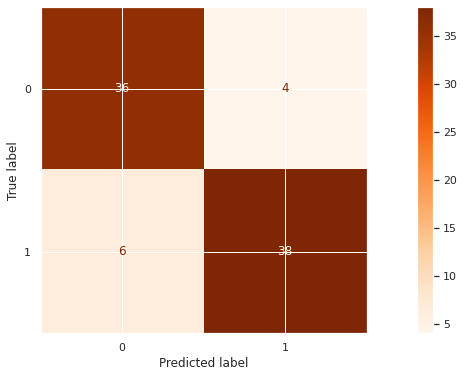

In [49]:
#matrix_confusion diagramme

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(grid, X_test, y_test, cmap=plt.cm.Oranges, normalize=None)

In [50]:
#print the matrix confusion

print('Confusion Matrix: \n', confusion_matrix(y_test, pred))

Confusion Matrix: 
 [[36  4]
 [ 6 38]]


In [51]:
#Evaluate the model on the training data set

pred = grid.predict(X_train)

print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       129
           1       1.00      0.99      1.00       121

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

